#### For ANN Binary Classification
1) Activation Function Used in hidden layers - relu, LeakyReLU<br>
2) Activation function used in output layer - sigmoid<br>
3) Optimzier - adam, rmsprop, sgd<br>
4) Loss Function - binary_crossentropy<br>


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [52]:
df.shape

(303, 14)

In [53]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [54]:
d1 = df['output'].value_counts()
d1

1    165
0    138
Name: output, dtype: int64

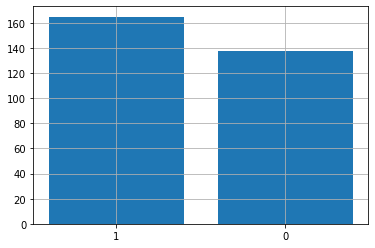

In [55]:
plt.bar(['1','0'],d1.values)
plt.grid()
plt.show()

In [56]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [57]:
x = df.iloc[:,:-1] # [age,sex, cp, trtbps, chol, fbs, restecg, thalachh ,exng, oldpeak, slp, caa, thall]
y = df.iloc[:,-1]  # output

In [58]:
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(303, 13)
(303,)


In [59]:
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [60]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(227, 13)
(76, 13)
(227,)
(76,)


In [63]:
x_train.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
135,49,0,0,130,269,0,1,163,0,0.0,2,0,2
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2


#### Build ANN Binary Classification Architecture
Model - 1

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.activations import relu

In [65]:
m1 = Sequential()                                 # Input layer has 13 neurons
m1.add(Dense(50,activation='relu',input_dim=13))  # H1 has 50 neurons
m1.add(Dense(25,activation='relu'))               # H2 has 25 neurons
m1.add(Dense(12,activation='relu'))               # H3 has 13 neurons
m1.add(Dense(1,activation='sigmoid'))             # Output layer has 1 neurons

m1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [66]:
h1 = m1.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
8/8 [==============================] - 1s 31ms/step - loss: 2.1891 - accuracy: 0.5066 - val_loss: 1.1246 - val_accuracy: 0.4211
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.8662 - accuracy: 0.4670 - val_loss: 0.7896 - val_accuracy: 0.5263
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6429 - accuracy: 0.6608 - val_loss: 0.6688 - val_accuracy: 0.6184
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6017 - accuracy: 0.6740 - val_loss: 0.6081 - val_accuracy: 0.6447
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 0.5886 - accuracy: 0.7181 - val_loss: 0.7172 - val_accuracy: 0.6447
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.5699 - accuracy: 0.7181 - val_loss: 0.6956 - val_accuracy: 0.6579
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 0.5555 - accuracy: 0.7181 - val_loss: 0.6089 - val_accuracy: 0.6579
Epoch 8/50
8/8 [=================

In [67]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
45,0.437719,0.775330,0.696353,0.644737,45
46,0.508515,0.762115,0.500048,0.763158,46
47,0.409548,0.823789,0.633399,0.657895,47
48,0.437389,0.823789,0.551087,0.750000,48
49,0.414890,0.788546,0.557152,0.723684,49


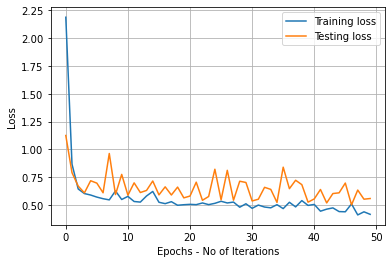

In [68]:
plt.plot(r1['Epochs'],r1['loss'],label='Training loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Testing loss')
plt.xlabel('Epochs - No of Iterations')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

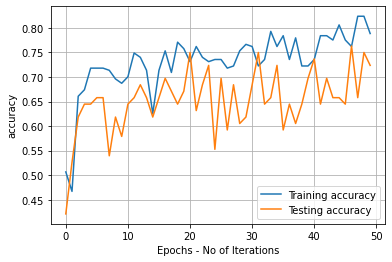

In [69]:
plt.plot(r1['Epochs'],r1['accuracy'],label='Training accuracy')
plt.plot(r1['Epochs'],r1['val_accuracy'],label='Testing accuracy')
plt.xlabel('Epochs - No of Iterations')
plt.ylabel('accuracy')
plt.grid()
plt.legend()
plt.show()

In [70]:
ypred = m1.predict(x_test)
ypred

array([[0.69078207],
       [0.08305317],
       [0.61986244],
       [0.7406321 ],
       [0.33528227],
       [0.27871102],
       [0.07384115],
       [0.9248214 ],
       [0.3535849 ],
       [0.4199763 ],
       [0.09653437],
       [0.51245683],
       [0.7751839 ],
       [0.5056442 ],
       [0.2592295 ],
       [0.85615104],
       [0.6098498 ],
       [0.07551032],
       [0.8981786 ],
       [0.4885176 ],
       [0.9670459 ],
       [0.5941293 ],
       [0.7893082 ],
       [0.96130264],
       [0.7835299 ],
       [0.9156342 ],
       [0.50685525],
       [0.7159288 ],
       [0.8001358 ],
       [0.5608514 ],
       [0.416277  ],
       [0.9424081 ],
       [0.532687  ],
       [0.9857023 ],
       [0.35831875],
       [0.7873652 ],
       [0.29598987],
       [0.96108365],
       [0.8402313 ],
       [0.0904443 ],
       [0.6778796 ],
       [0.838536  ],
       [0.15812808],
       [0.96517825],
       [0.67699677],
       [0.5951971 ],
       [0.90246665],
       [0.893

In [71]:
# list comprehension
ypred_m1 = [1 if i>0.5 else 0 for i in ypred]
print(ypred_m1)

[1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]


In [72]:
print(list(y_test))

[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0]


In [73]:
from sklearn.metrics import confusion_matrix, classification_report

In [74]:
cm = confusion_matrix(y_test,ypred_m1)
print(cm)
print(classification_report(y_test,ypred_m1))
# [TP=25  FN=7]
# [FP=16   TN=28]

[[22 18]
 [ 3 33]]
              precision    recall  f1-score   support

           0       0.88      0.55      0.68        40
           1       0.65      0.92      0.76        36

    accuracy                           0.72        76
   macro avg       0.76      0.73      0.72        76
weighted avg       0.77      0.72      0.72        76

